In [5]:
whisper_path=["openai/whisper-tiny","openai/whisper-base","openai/whisper-small","openai/whisper-medium","openai/whisper-large","openai/whisper-large-v2","openai/whisper-large-v3"]

In [6]:
import json
import pandas
def loadTrainHistory(path,v=""):
    with open("../fineTune/fineTue/"+path+"/checkpoint-4000"+v+"/trainer_state.json", 'r') as f:
        history = json.load(f)
    loss=[]
    epochs=[]
    for i in range(len(history["log_history"])):
        if("loss" in history["log_history"][i]):
            loss.append(history["log_history"][i]["loss"])
            epochs.append(i)
    pd=pandas.DataFrame(history["log_history"])
    return pd

In [7]:
print(loadTrainHistory(whisper_path[0]))

     epoch  learning_rate    loss  step  eval_loss  eval_runtime  \
0     0.03   3.800000e-07  4.2090    25        NaN           NaN   
1     0.06   8.800000e-07  3.5540    50        NaN           NaN   
2     0.09   1.380000e-06  2.6739    75        NaN           NaN   
3     0.11   1.880000e-06  1.9438   100        NaN           NaN   
4     0.14   2.380000e-06  1.4117   125        NaN           NaN   
..     ...            ...     ...   ...        ...           ...   
159   4.48   2.314286e-07  0.2752  3925        NaN           NaN   
160   4.51   1.600000e-07  0.2911  3950        NaN           NaN   
161   4.54   8.857143e-08  0.3176  3975        NaN           NaN   
162   4.57   1.714286e-08  0.2756  4000        NaN           NaN   
163   4.57            NaN     NaN  4000   0.553046      116.7723   

     eval_samples_per_second  eval_steps_per_second  eval_wer  
0                        NaN                    NaN       NaN  
1                        NaN                    NaN    

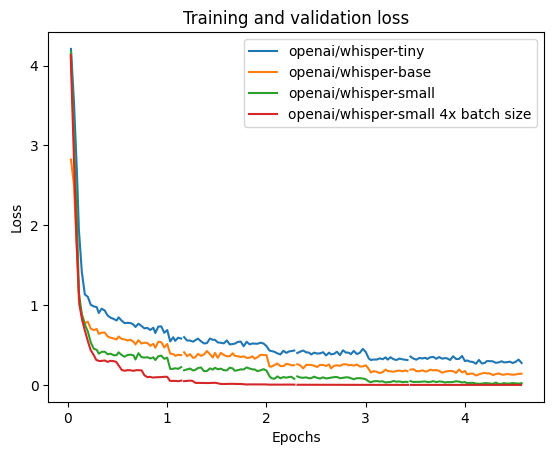

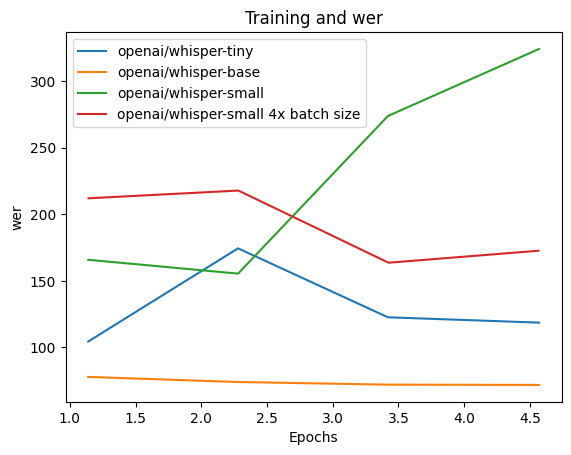

In [8]:
import matplotlib.pyplot as plt

model_cnt=3
# assuming you have a trained model and its history stored in a variable called `history`
history = [loadTrainHistory(whisper_path[i]) for i in range(model_cnt)]
# val_loss = history.history['val_loss']

w2_4=loadTrainHistory(whisper_path[2],v="-4")
w2_4["epoch"]/=4

# plot the loss and validation loss over epochs
for i in range(model_cnt):
    plt.plot(history[i]["epoch"], history[i]["loss"], label=whisper_path[i])
plt.plot(w2_4["epoch"], w2_4["loss"], label=whisper_path[2]+" 4x batch size")
# plt.plot(history["epoch"], history["loss"], 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()


# val_loss = history.history['val_loss']

# plot the loss and validation loss over epochs
for i in range(model_cnt):
    
    werhistory=history[i][history[i]["eval_wer"].notna()]
    plt.plot(werhistory["epoch"], werhistory["eval_wer"], label=whisper_path[i])
w2_4=w2_4[w2_4["eval_wer"].notna()]
plt.plot(w2_4["epoch"], w2_4["eval_wer"],  label=whisper_path[2]+" 4x batch size")
# plt.plot(history["epoch"], history["eval_wer"], 'bo', label='wer')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and wer')
plt.xlabel('Epochs')
plt.ylabel('wer')

plt.legend()
plt.show()


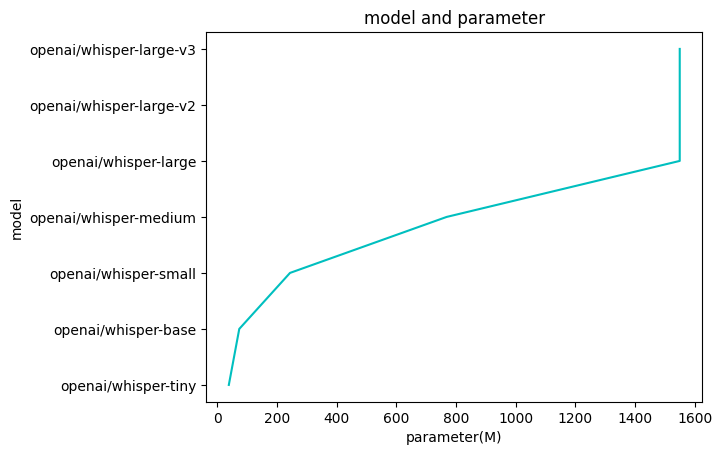

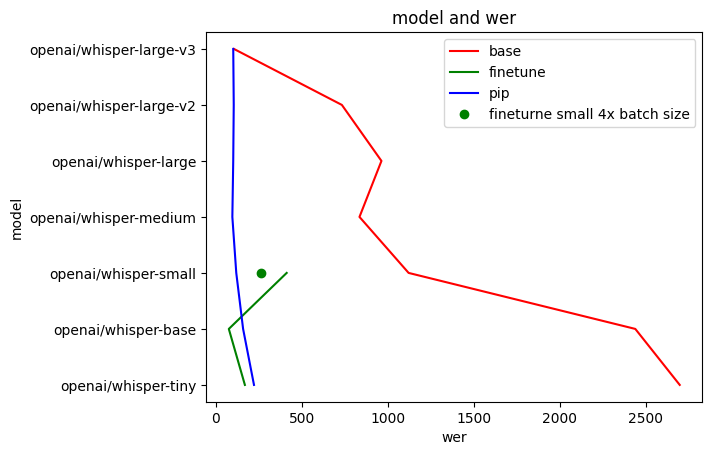

In [20]:
import matplotlib.pyplot as plt
evaluationBaseZhHK1000=[2696.6162065894923,2438.4683882457703,1121.193232413179,835.6188780053427,963.3125556544968,733.3036509349956,105.87711487088156]
evaluationFinTuneZhHK1000=[169.7239536954586,76.40249332146037,412.55565449688334]
evaluationPIPZhHK1000=[222.6546906187625,159.3812375249501,119.66067864271457,96.9061876247505,101.99600798403195,104.99001996007983,102.09580838323353]
model_param=[39,74 ,244 ,769 ,1550 ,1550 ,1550]

plt.plot(model_param, whisper_path, 'c', label='param')
plt.title('model and parameter')
plt.xlabel('parameter(M)')
plt.ylabel('model')
plt.show()


plt.plot(evaluationBaseZhHK1000, whisper_path, 'r', label='base')
# plt.show()
plt.plot(evaluationFinTuneZhHK1000, whisper_path[:3], 'g', label='finetune')
plt.plot(evaluationPIPZhHK1000, whisper_path[:7], 'b', label='pip')
plt.plot([262.60017809439], [2],'go',  label='fineturne small 4x batch size')

plt.title('model and wer')
plt.xlabel('wer')
plt.ylabel('model')

plt.legend()
plt.show()

